In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imageio import imread
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
DATA_DIR = 'data/'
DATA_FILENAME = 'data_naive1d_subset20k'

In [3]:
data_train = np.load(DATA_DIR + DATA_FILENAME + '_train' + '.npz')
X_train = data_train['X']
y_train = data_train['y']
data_train.close()
X_train.shape, y_train.shape

((20000, 9216), (20000,))

In [4]:
data_test = np.load(DATA_DIR + DATA_FILENAME + '_test' + '.npz')
X_test = data_test['X']
y_test = data_test['y']
data_test.close()
X_test.shape, y_test.shape

((10000, 9216), (10000,))

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf = LogisticRegression(class_weight='balanced', max_iter=3000)

In [7]:
clf.fit(X_train, y_train)
clf.n_iter_

array([2154], dtype=int32)

In [8]:
clf.score(X_train, y_train)

0.9083

In [9]:
y_hat = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_hat)
print(accuracy)

0.5323


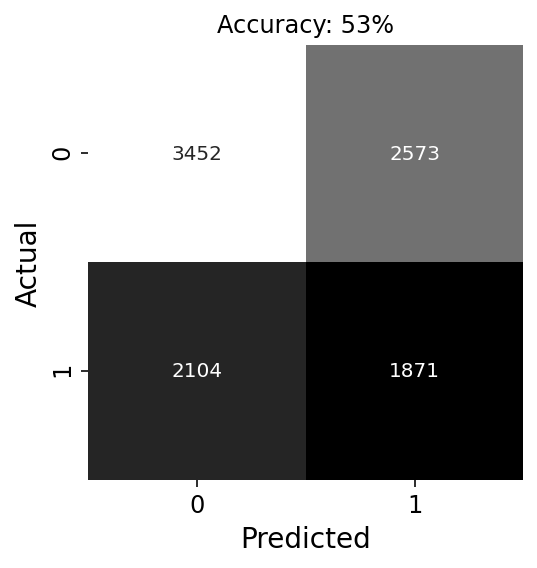

In [10]:
cm = metrics.confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt=".0f", cmap='gray', cbar=False, square = True);
plt.ylabel('Actual', fontsize=14);
plt.xlabel('Predicted', fontsize=14);
plt.title(f'Accuracy: {accuracy*100:.0f}%');
plt.tick_params(labelsize= 12)